<a href="https://colab.research.google.com/github/SrinivasKeshav/AI-ML_Hackathon/blob/main/Hackathon(1RN19CS154).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",names = ["age", "sex", "cp", "trestbps", "chol", "fbs" ,"restecg" ,"thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Data Analysis

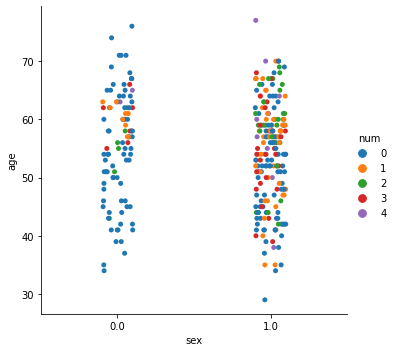

In [ ]:
sns.catplot(data=df, x='sex', y='age',  hue='num')

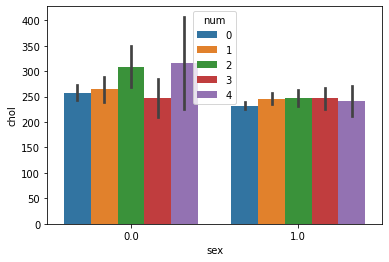

In [ ]:
sns.barplot(data=df, x='sex', y='chol', hue='num')

In [ ]:
df['sex'].value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [ ]:
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Data Preprocessing

In [ ]:
#categorizing num>1 as num=1
for i in df['num']:
  if i==2 or i==3 or i==4:
    df['num'] = df['num'].replace(i,1)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
#converting object datatypes to float
df['ca'] = pd.to_numeric(df['ca'],errors = 'coerce')
df['thal'] = pd.to_numeric(df['thal'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
#dropping rows with null values
df = df.dropna()

In [ ]:
df.shape

(297, 14)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
df['num'].value_counts()

0    160
1    137
Name: num, dtype: int64

Splitting num and rest of the attributes

In [ ]:
x = df.drop(columns='num', axis=1)
y = df['num']

In [ ]:
print(x)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  
0      3.0  0.0   6.0  
1  

In [ ]:
print(y)

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: num, Length: 297, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(297, 13) (237, 13) (60, 13)


Model Training using Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy of Train data : ', training_data_accuracy)

Accuracy of Train data :  0.8649789029535865


In [ ]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy of Test data : ', test_data_accuracy)

Accuracy of Test data :  0.8333333333333334


In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,x_test_prediction)
cm

array([[26,  6],
       [ 4, 24]])

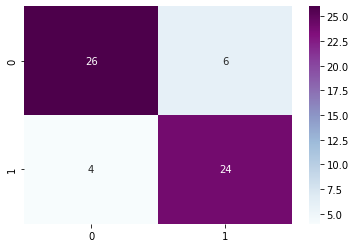

In [ ]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [ ]:
input = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
ip= np.asarray(input)

# reshape the numpy array as we are predicting for only on instance
ip_reshaped = ip.reshape(1,-1)

prediction = model.predict(ip_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [ ]:
precision = cm[1][1] / (cm[1][1]+cm[1][0])
recall = cm[1][1] / (cm[1][1]+cm[0][1])
f1_lr = 2 * (precision * recall) / (precision + recall)
print(f1_lr)

0.8275862068965518


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(x_train,y_train)
prediction2=model2.predict(x_test)
cm2= confusion_matrix(y_test,prediction2)

In [ ]:
accuracy_score(y_test,prediction2)

0.7333333333333333

In [ ]:
precision = cm2[1][1] / (cm2[1][1]+cm2[1][0])
recall = cm2[1][1] / (cm2[1][1]+cm2[0][1])
f1_dt = 2 * (precision * recall) / (precision + recall)
print(f1_dt)

0.7142857142857143


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model3 = KNN.fit(x_train, y_train)
prediction3 = model3.predict(x_test)
cm3= confusion_matrix(y_test, prediction3)

In [ ]:
accuracy_score(y_test,prediction3)

0.7

In [ ]:
precision = cm3[1][1] / (cm3[1][1]+cm3[1][0])
recall = cm3[1][1] / (cm3[1][1]+cm3[0][1])
f1_knn = 2 * (precision * recall) / (precision + recall)
print(f1_knn)

0.6538461538461539


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model4 = NB.fit(x_train, y_train)
prediction4 = model4.predict(x_test)
cm4= confusion_matrix(y_test, prediction4)

In [ ]:
accuracy_score(y_test,prediction3)

0.7

In [ ]:
precision = cm4[1][1] / (cm4[1][1]+cm4[1][0])
recall = cm4[1][1] / (cm4[1][1]+cm4[0][1])
f1_nb = 2 * (precision * recall) / (precision + recall)
print(f1_nb)

0.8571428571428571


In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','KNN','Naive Bayes'],'f1 score':[f1_lr,f1_dt,f1_knn,f1_nb]})
model_ev

,Model,f1 score
0,Logistic Regression,0.827586
1,Decision Tree,0.714286
2,KNN,0.653846
3,Naive Bayes,0.857143
